# Análisis exploratorio de MIND News Dataset

## Descargar Dataset

In [1]:
!gdown --id 1-L3Vt-THvSbjGIbwv5Emwzwevlj_gkD0

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-L3Vt-THvSbjGIbwv5Emwzwevlj_gkD0
To: /content/behaviors.tsv
100% 92.0M/92.0M [00:01<00:00, 48.7MB/s]


In [2]:
!gdown --id 184sKi7airYkp8WVhMB3oW_oVf4muYMQA

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=184sKi7airYkp8WVhMB3oW_oVf4muYMQA
To: /content/entity_embedding.vec
100% 25.8M/25.8M [00:00<00:00, 38.5MB/s]


In [3]:
!gdown --id 1vJyH5_FKMwVMTCyjl9VQtJNYFHb7nGuE

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vJyH5_FKMwVMTCyjl9VQtJNYFHb7nGuE
To: /content/news.tsv
100% 41.2M/41.2M [00:01<00:00, 28.7MB/s]


In [4]:
!gdown --id 1nhAgE772ThgqKaplMeZbSAaxHeiGsDg5

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nhAgE772ThgqKaplMeZbSAaxHeiGsDg5
To: /content/relation_embedding.vec
100% 1.04M/1.04M [00:00<00:00, 141MB/s]


## Análisis exploratorio

In [ ]:
import pandas as pd

behaviors = pd.read_csv('behaviors.tsv', sep='\t', names=['Impression ID', 'User ID', 'Time', 'History', 'Impressions'])

news = pd.read_csv('news.tsv', sep='\t', names=['News ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL', 'Title Entities', 'Abstract Entities'])

print(behaviors.head())
print(news.head())


   Impression ID User ID                   Time  \
0              1  U13740  11/11/2019 9:05:58 AM   
1              2  U91836  11/12/2019 6:11:30 PM   
2              3  U73700  11/14/2019 7:01:48 AM   
3              4  U34670  11/11/2019 5:28:05 AM   
4              5   U8125  11/12/2019 4:11:21 PM   

                                             History  \
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...   
1  N31739 N6072 N63045 N23979 N35656 N43353 N8129...   
2  N10732 N25792 N7563 N21087 N41087 N5445 N60384...   
3  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...   
4                        N10078 N56514 N14904 N33740   

                                         Impressions  
0                                  N55689-1 N35729-0  
1  N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...  
2  N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...  
3                N35729-0 N33632-0 N49685-1 N27581-0  
4  N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...  
  News ID   Category      

In [ ]:
total_impressions = behaviors.shape[0]
unique_users = behaviors['User ID'].nunique()
impressions_per_user = behaviors.groupby('User ID').size()
news_clicks = behaviors['Impressions'].apply(lambda x: sum([int(impression.split('-')[1]) for impression in x.split(' ')]))

print(f"Total Impressions: {total_impressions}")
print(f"Unique Users: {unique_users}")
print(impressions_per_user.describe())
print(news_clicks.describe())

Total Impressions: 156965
Unique Users: 50000
count    50000.000000
mean         3.139300
std          3.001026
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         62.000000
dtype: float64
count    156965.000000
mean          1.505711
std           1.153102
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          35.000000
Name: Impressions, dtype: float64


In [ ]:
total_news_articles = news.shape[0]
news_categories = news['Category'].value_counts()
news_subcategories = news['SubCategory'].value_counts()
title_lengths = news['Title'].apply(len)
news['Abstract'] = news['Abstract'].fillna('')
abstract_lengths = news['Abstract'].apply(len)

print(f"Total News Articles: {total_news_articles}")
print(news_categories)
print(news_subcategories)
print(title_lengths.describe())
print(abstract_lengths.describe())

Total News Articles: 51282
Category
news             15774
sports           14510
finance           3107
foodanddrink      2551
lifestyle         2479
travel            2350
video             2068
weather           2048
health            1885
autos             1639
tv                 889
music              769
movies             606
entertainment      587
kids                17
middleeast           2
northamerica         1
Name: count, dtype: int64
SubCategory
newsus                    6564
football_nfl              5420
newspolitics              2826
newscrime                 2254
weathertopstories         2047
                          ... 
newsvideo                    1
travel                       1
lifestylehoroscopefish       1
baseball                     1
celebhub                     1
Name: count, Length: 264, dtype: int64
count    51282.000000
mean        66.247241
std         19.216860
min         11.000000
25%         54.000000
50%         64.000000
75%         78.000000
m

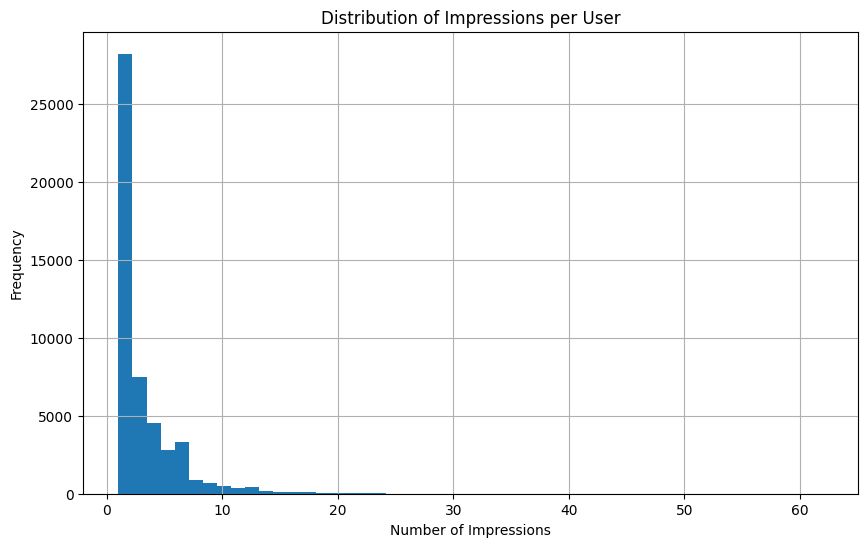

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
impressions_per_user.hist(bins=50)
plt.title('Distribution of Impressions per User')
plt.xlabel('Number of Impressions')
plt.ylabel('Frequency')
plt.show()

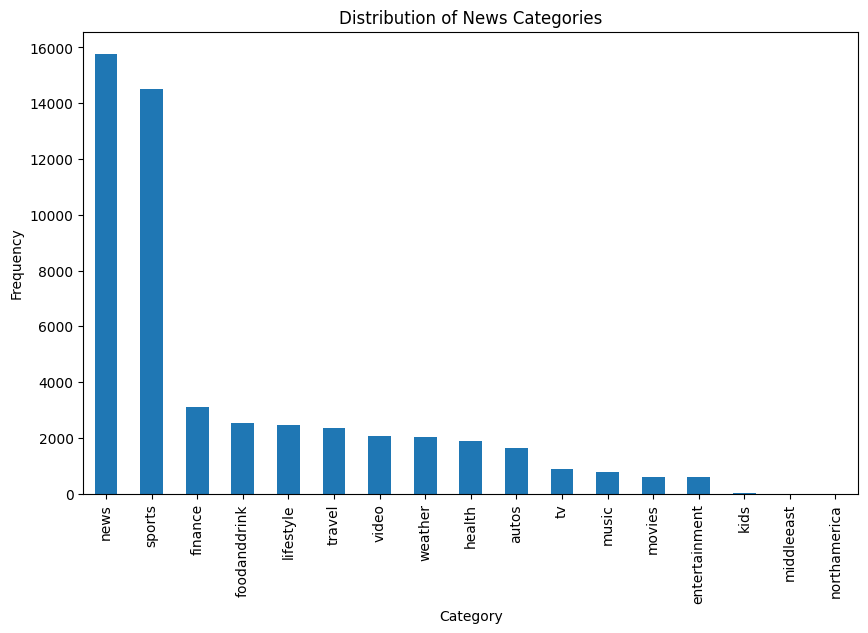

In [ ]:
plt.figure(figsize=(10, 6))
news_categories.plot(kind='bar')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

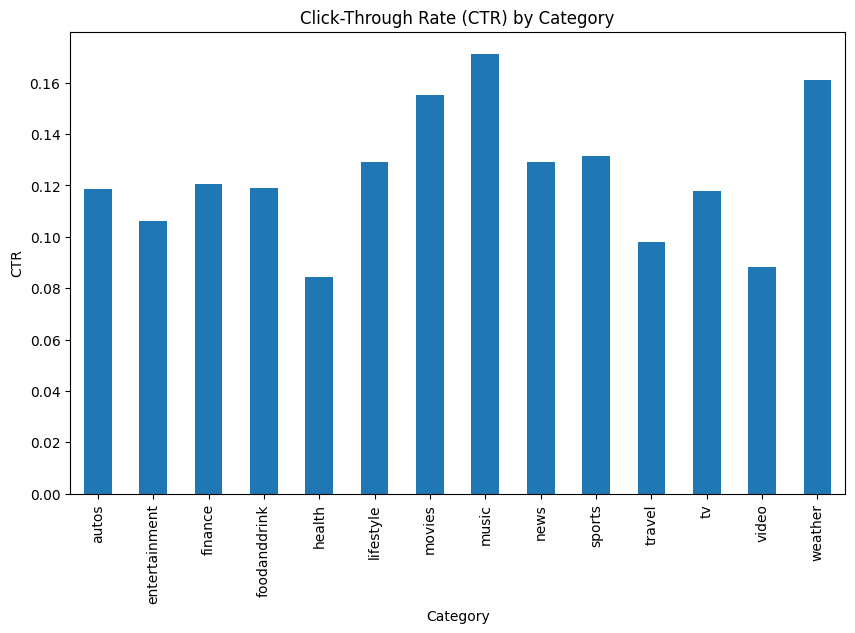

In [ ]:
def calculate_ctr(impressions):
    impressions = impressions.split(' ')
    clicks = sum([int(impression.split('-')[1]) for impression in impressions])
    return clicks / len(impressions)

behaviors['CTR'] = behaviors['Impressions'].apply(calculate_ctr)

behaviors = behaviors.merge(news[['News ID', 'Category']], left_on='History', right_on='News ID', how='left')

category_ctr = behaviors.groupby('Category')['CTR'].mean()

plt.figure(figsize=(10, 6))
category_ctr.plot(kind='bar')
plt.title('Click-Through Rate (CTR) by Category')
plt.xlabel('Category')
plt.ylabel('CTR')
plt.show()

# Análisis exploratorio de Adressa News Dataset

## Descargar Dataset

Solamente descargamos un día de la semana, ya que no es necesario ver cada día.

In [ ]:
!gdown --id 1n-xCw4rtvxzytZzQ2OvoEhccP0nWY281

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1n-xCw4rtvxzytZzQ2OvoEhccP0nWY281
From (redirected): https://drive.google.com/uc?id=1n-xCw4rtvxzytZzQ2OvoEhccP0nWY281&confirm=t&uuid=327458ba-c776-4acd-a7e9-e7b212b79610
To: /content/20170101
100% 1.82G/1.82G [00:35<00:00, 50.9MB/s]


## Análisis exploratorio

In [ ]:
import pandas as pd

file_path = '20170101'
data = pd.read_json(file_path, lines=True)

print(data.head())

      eventId       city  activeTime  \
0   672342954       oslo         8.0   
1   335855522  trondheim        79.0   
2  1076735442  trondheim         NaN   
3  1828562778   orkanger       398.0   
4  1743490268     hurdal         NaN   

                                                 url referrerHostClass  \
0                                  http://adressa.no            direct   
1  http://adressa.no/nyheter/2016/12/31/se-lesern...            search   
2  http://adressa.no/epaper_visiolink_vertical_light            direct   
3  http://adressa.no/reise/dette-er-noen-av-verde...          internal   
4  http://adressa.no/nyheter/trondheim/2016/12/29...            social   

          region        time                                      userId  \
0           oslo  1483225202     cx:13116981155471447840854:z9xm0v0hh3qy   
1  sor-trondelag  1483225202  cx:2fs9x8i7jvcjyckoxqfa6l4lw:3rr1gvpcbzx8w   
2  sor-trondelag  1483225202  cx:2kog3lvz0y7gi2vfqvnetp2j5v:52621sn0okgv   
3  sor-tro

In [ ]:
total_events = data.shape[0]

unique_users = data['userId'].nunique()

average_active_time = data['activeTime'].mean()

print(f"Total Events: {total_events}")
print(f"Unique Users: {unique_users}")
print(f"Average Active Time: {average_active_time:.2f} seconds")

Total Events: 1513739
Unique Users: 248892
Average Active Time: 40.69 seconds


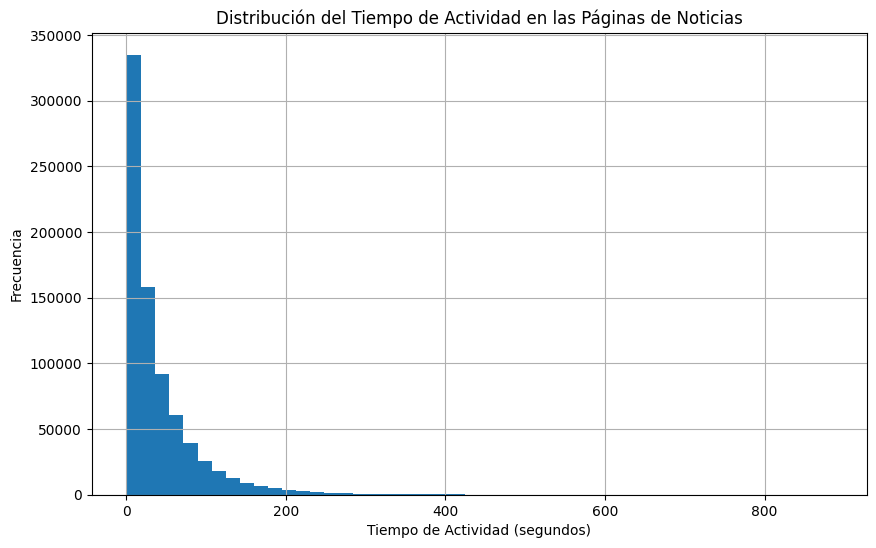

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['activeTime'].dropna().hist(bins=50)
plt.title('Distribución del Tiempo de Actividad en las Páginas de Noticias')
plt.xlabel('Tiempo de Actividad (segundos)')
plt.ylabel('Frecuencia')
plt.show()

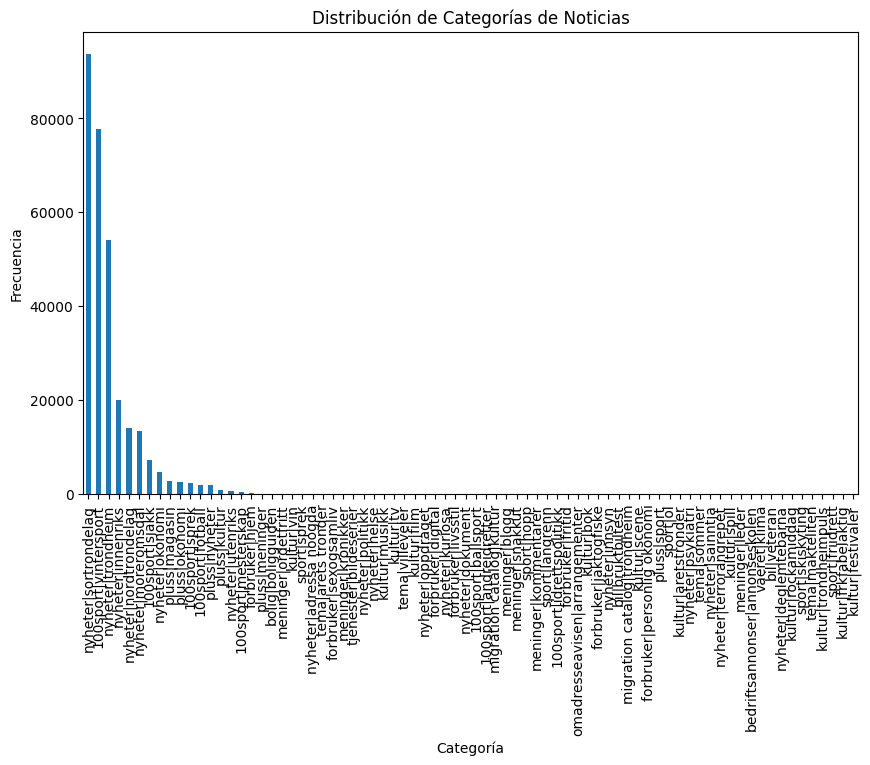

In [ ]:
news_categories = data['category1'].value_counts()

plt.figure(figsize=(10, 6))
news_categories.plot(kind='bar')
plt.title('Distribución de Categorías de Noticias')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()


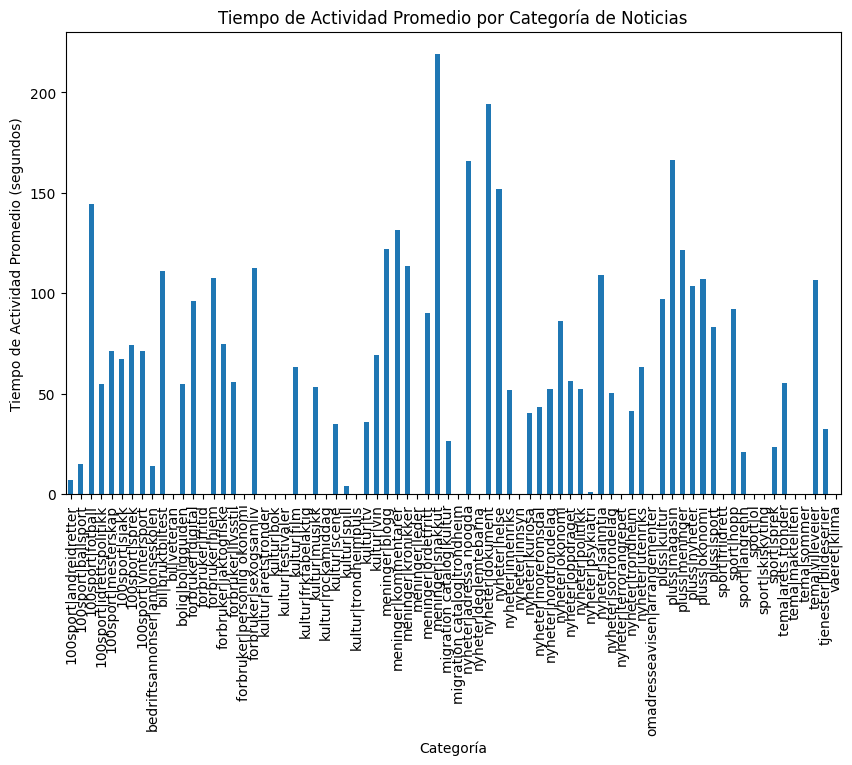

In [ ]:
active_time_by_category = data.groupby('category1')['activeTime'].mean()

plt.figure(figsize=(10, 6))
active_time_by_category.plot(kind='bar')
plt.title('Tiempo de Actividad Promedio por Categoría de Noticias')
plt.xlabel('Categoría')
plt.ylabel('Tiempo de Actividad Promedio (segundos)')
plt.show()


# Modelo RL

## Experimentos Fallidos

In [ ]:
!pip install datasets

In [ ]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

import string
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import requests
from bs4 import BeautifulSoup
from load_dataset import load_train_datasets, get_dataset_info, save_dataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


ModuleNotFoundError: No module named 'load_dataset'

### Load dataset

In [ ]:
file_path = 'news.tsv'
news_df = pd.read_csv(file_path, sep='\t')

news_df = news_df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df, temp_df = train_test_split(news_df, test_size=0.3, random_state=42)
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

os.makedirs('dataset/train', exist_ok=True)
os.makedirs('dataset/dev', exist_ok=True)
os.makedirs('dataset/test', exist_ok=True)

train_df.to_csv('dataset/train/news.tsv', sep='\t', index=False)
dev_df.to_csv('dataset/dev/news.tsv', sep='\t', index=False)
test_df.to_csv('dataset/test/news.tsv', sep='\t', index=False)

print(f"Train set size: {len(train_df)}")
print(f"Dev set size: {len(dev_df)}")
print(f"Test set size: {len(test_df)}")

Train set size: 35896
Dev set size: 7692
Test set size: 7693


In [ ]:
file_path = 'behaviors.tsv'
behaviors_df = pd.read_csv(file_path, sep='\t')

behaviors_df = behaviors_df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df, temp_df = train_test_split(behaviors_df, test_size=0.3, random_state=42)
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

os.makedirs('dataset/train', exist_ok=True)
os.makedirs('dataset/dev', exist_ok=True)
os.makedirs('dataset/test', exist_ok=True)

train_df.to_csv('dataset/train/behaviors.tsv', sep='\t', index=False)
dev_df.to_csv('dataset/dev/behaviors.tsv', sep='\t', index=False)
test_df.to_csv('dataset/test/behaviors.tsv', sep='\t', index=False)

print(f"Train set size: {len(train_df)}")
print(f"Dev set size: {len(dev_df)}")
print(f"Test set size: {len(test_df)}")

Train set size: 109874
Dev set size: 23545
Test set size: 23545


#### Load dataset utils

In [ ]:
from ast import literal_eval

news = pd.concat(
    [
        pd.read_csv("dataset/train/news.tsv", sep="\t", header=None),
        pd.read_csv("dataset/dev/news.tsv", sep="\t", header=None),
        pd.read_csv("dataset/test/news.tsv", sep="\t", header=None),
    ]
)

news.columns = [
    "News ID",
    "Category",
    "SubCategory",
    "Title",
    "Abstract",
    "URL",
    "Title Entities",
    "Abstract Entities",
]

news.drop_duplicates(subset=["News ID"], keep="last", inplace=True, ignore_index=True)


def load_train_datasets() -> pd.DataFrame:
    """return behaviors, news"""
    behaviors_train = pd.read_csv("dataset/train/behaviors.tsv", sep="\t", header=None)
    behaviors_train.columns = [
        "Impression ID",
        "User ID",
        "Time",
        "History",
        "Impressions",
    ]
    return behaviors_train, news


def load_dev_datasets() -> pd.DataFrame:
    """return behaviors, news"""
    behaviors_dev = pd.read_csv("dataset/dev/behaviors.tsv", sep="\t", header=None)
    behaviors_dev.columns = [
        "Impression ID",
        "User ID",
        "Time",
        "History",
        "Impressions",
    ]
    return behaviors_dev, news


def load_test_datasets() -> pd.DataFrame:
    """return behaviors, news"""
    behaviors_test = pd.read_csv("dataset/test/behaviors.tsv", sep="\t", header=None)
    behaviors_test.columns = [
        "Impression ID",
        "User ID",
        "Time",
        "History",
        "Impressions",
    ]
    return behaviors_test, news


def get_dataset_info(behaviors: pd.DataFrame, news: pd.DataFrame) -> None:
    """print shape & head of dataframs"""
    print("behaviors shape:")
    print(behaviors.shape)
    print("news shape:")
    print(news.shape)
    print("behaviors head:")
    print(behaviors.head())
    print("news head:")
    print(news.head())


def save_dataset(df: pd.DataFrame, name: str) -> None:
    df.to_csv("dataset/" + name + ".tsv", sep="\t", index=False)
    print(name, "saved successfully!")


def load_featured_dataset() -> pd.DataFrame:
    """return behaviors, news"""
    behaviors = pd.read_csv(
        "dataset/behaviors.tsv",
        sep="\t",
        converters={"History": literal_eval, "Impression": literal_eval},
    )
    news = pd.read_csv("dataset/news.tsv", sep="\t")
    return behaviors, news


def load_news_dataset() -> pd.DataFrame:
    """return news"""
    return news

In [ ]:
from pydantic import BaseModel, StrictStr


class User(BaseModel):
    user_id: StrictStr

class Response(BaseModel):
    user_response: int

class News(BaseModel):
    news_id : StrictStr
    title: StrictStr
    abstract: StrictStr

### DQN

In [ ]:
from collections import deque, namedtuple
from random import sample
import torch
import torch.nn as nn
import torch.nn.functional as F


BATCH_SIZE = 2
MEMORY_SIZE = 10000
INPUT_SIZE = 346  # state_size
OUTPUT_SIZE = 18  # action_space_size
HIDDEN_SIZE = 64
GAMMA = 0.99
LEARNING_RATE = 1e-4


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Episode = namedtuple("Episode", ("state", "action", "reward", "next_state"))


class ReplayMemory:
    def __init__(self) -> None:
        self.capacity = MEMORY_SIZE
        self.batch_size = BATCH_SIZE
        self.memory = deque(maxlen=self.capacity)

    def __len__(self) -> int:
        return len(self.memory)

    def push(self, *args: Episode) -> None:
        self.memory.append(Episode(*args))

    def sample(self) -> list:
        return sample(self.memory, self.batch_size)


class DQN(nn.Module):
    def __init__(self) -> None:
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(INPUT_SIZE, HIDDEN_SIZE)
        self.fc2 = nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE)
        self.fc3 = nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.to(device)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=-1)
        return x


def optimize_model(
    memory: ReplayMemory, policy_net: DQN, target_net: DQN, optimizer: torch.optim.Optimizer
) -> None:
    if len(memory) < BATCH_SIZE:
        return
    episodes = memory.sample()
    batch = Episode(*zip(*episodes))
    state_batch = torch.cat(batch.state).reshape(BATCH_SIZE, -1).to(device)
    action_batch = torch.cat(batch.action).to(device)
    reward_batch = torch.cat(batch.reward).reshape(BATCH_SIZE, -1).expand(-1, OUTPUT_SIZE).reshape(-1).to(device)
    next_state_batch = torch.cat(batch.next_state).reshape(BATCH_SIZE, -1).to(device)
    state_action_values = (
        policy_net(state_batch)
        .gather(1, action_batch.type(torch.int64).unsqueeze(0))
        .squeeze(0)
    )
    next_state_values = target_net(next_state_batch).reshape(-1)
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values)
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

### Features

In [ ]:
behaviors, news = load_train_datasets()
get_dataset_info(behaviors=behaviors, news=news)

class Features:
    def __init__(self, news_df: pd.DataFrame, behaviors_df: pd.DataFrame) -> None:
        # tfidf dimension reduction parameter
        self.tfidf_n_component = 64
        # get dataframes
        self.news_df = news_df
        self.behaviors_df = behaviors_df
        # dictionary defitions
        self.history_dict = self.__create_news_dict__(news_df)

    def fit(self, X, y=None) -> None:
        # does nothing
        X = X

    def transform(self, X) -> pd.DataFrame:
        """return behaviors dataframe, news dataframe"""
        self.behaviors_df = (
            self.behaviors_df.pipe(self.drop_na_history)
            .pipe(self.keep_unique_users)
            # .pipe(self.to_datetime)
            .pipe(self.to_list_history)
            .pipe(self.to_list_impression)
            .pipe(self.history_click_count)
            .pipe(self.to_dict_impression)
            .pipe(self.drop_behavior_cols)
        )

        self.news_df = self.__merg_dfs__(
            self.news_df, self.__dict_to_df__(self.history_dict, "History Click Count")
        )

        self.news_df = (
            self.news_df.pipe(self.news_popularity)
            .pipe(self.news_cat_one_hot)
            .pipe(self.news_subcat_one_hot)
            .pipe(self.news_title_tfidf)
            .pipe(self.drop_news_cols)
        )

        return self.behaviors_df, self.news_df

    def drop_na_history(self, df: pd.DataFrame) -> pd.DataFrame:
        df.dropna(subset=["History"], inplace=True)
        print("... done with drop_na_history() ...")
        return df

    def keep_unique_users(self, df: pd.DataFrame) -> pd.DataFrame:
        df.drop_duplicates(subset=["User ID"], keep="last", inplace=True, ignore_index=True)
        print("... done with keep_unique_users() ...")
        return df

    def to_datetime(self, df: pd.DataFrame) -> pd.DataFrame:
        df["Time"] = df["Time"].astype("datetime64[ns]")
        df.sort_values(by=["Time"], ignore_index=True, inplace=True)
        print("... done with to_datetime() ...")
        return df

    def to_list_history(self, df: pd.DataFrame) -> pd.DataFrame:
        df["History"] = df["History"].apply(lambda x: x[0 : len(x)].split(" "))
        print("... done with to_list_history() ...")
        return df

    def to_list_impression(self, df: pd.DataFrame) -> pd.DataFrame:
        df["Impressions"] = df["Impressions"].apply(lambda x: x[0 : len(x)].split(" "))
        print("... done with to_list_impression() ...")
        return df

    def history_click_count(self, df: pd.DataFrame) -> pd.DataFrame:
        def __clicks_count__(news_ids: list) -> None:
            for news_id in news_ids:
                value = self.history_dict.get(news_id)
                value += 1
                self.history_dict[news_id] = value

        df["History"].apply(__clicks_count__)
        print("... done with history_click_count() ...")
        return df

    def to_dict_impression(self, df: pd.DataFrame) -> pd.DataFrame:
        def __keep_dict__(impression: list) -> dict:
            news = dict()
            for imp in impression:
                split = imp.split("-")
                news_id = split[0]
                news_value = split[1]
                news.update({news_id: news_value})
            return news

        df["Impressions"] = df["Impressions"].apply(__keep_dict__)
        print("... done with to_dict_impression() ...")
        return df

    def drop_behavior_cols(self, df: pd.DataFrame) -> pd.DataFrame:
        print("... done with drop_behavior_cols() ...")
        return df.drop(["Impression ID"], axis=1)

    def news_popularity(self, df: pd.DataFrame) -> pd.DataFrame:
        df["Popularity"] = df["History Click Count"]
        print("... done with news_popularity() ...")
        return df

    def news_cat_one_hot(self, df: pd.DataFrame) -> pd.DataFrame:
        print("... done with news_cat_one_hot() ...")
        return pd.get_dummies(df, columns=["Category"])

    def news_subcat_one_hot(self, df: pd.DataFrame) -> pd.DataFrame:
        print("... done with news_subcat_one_hot() ...")
        return pd.get_dummies(df, columns=["SubCategory"])

    def news_title_tfidf(self, df: pd.DataFrame) -> pd.DataFrame:
        def __preprocessor__(text: str) -> str:
            text = text.translate(str.maketrans(string.digits, " " * len(string.digits)))
            text = text.translate(str.maketrans(string.punctuation, " " * len(string.punctuation)))
            return text

        def __tokenizer__(text: str) -> str:
            return word_tokenize(text)

        vectorizer = TfidfVectorizer(
            preprocessor=__preprocessor__,
            tokenizer=__tokenizer__,
            stop_words=stopwords.words("english"),
        )
        tfidf = pd.DataFrame.sparse.from_spmatrix(vectorizer.fit_transform(df["Title"]))
        t_svd = TruncatedSVD(n_components=self.tfidf_n_component)
        tfidf_svd = pd.DataFrame(t_svd.fit_transform(tfidf))
        print("... done with news_title_tfidf() ...")
        return pd.concat([df, tfidf_svd], axis=1)

    def drop_news_cols(self, df: pd.DataFrame) -> pd.DataFrame:
        print("... done with drop_news_cols() ...")
        return df.drop(
            [
                "Title",
                "Abstract",
                "URL",
                "Title Entities",
                "Abstract Entities",
                "History Click Count",
            ],
            axis=1,
        )

    def __create_news_dict__(self, df: pd.DataFrame) -> pd.DataFrame:
        return {row: 0 for row in df["News ID"]}

    def __dict_to_df__(self, news_dict: dict, col_name: str) -> pd.DataFrame:
        df = pd.DataFrame(news_dict.values(), index=news_dict.keys()).rename(columns={0: col_name})
        df.index.names = ["News ID"]
        return df

    def __merg_dfs__(
        self, first_df: pd.DataFrame, second_df: pd.DataFrame
    ) -> pd.DataFrame:
        return pd.merge(first_df, second_df, on="News ID")


B = behaviors.copy()
N = news.copy()

estimators = [("features", Features(news_df=N, behaviors_df=B))]
pipe = Pipeline(estimators)
pipe.fit([N, B])
B, N = pipe.transform([N, B])

get_dataset_info(behaviors=B, news=N)

save_dataset(df=B, name="behaviors")
save_dataset(df=N, name="news")

behaviors shape:
(109875, 5)
news shape:
(51282, 8)
behaviors head:
   Impression ID User ID                   Time  \
0              1  U13740  11/11/2019 9:05:58 AM   
1           9228  U14776  11/11/2019 2:42:22 PM   
2          71457  U47599  11/13/2019 9:02:52 AM   
3         111880  U44791  11/13/2019 3:35:57 PM   
4          55243  U73678  11/12/2019 6:26:17 AM   

                                             History  \
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...   
1                  N64589 N64554 N6907 N46818 N55582   
2  N42989 N16215 N55189 N63650 N16874 N46978 N770...   
3  N31202 N32372 N20121 N60454 N63203 N18030 N173...   
4  N5227 N53393 N55846 N3500 N39813 N719 N51741 N...   

                                         Impressions  
0                                  N55689-1 N35729-0  
1  N30518-0 N55689-0 N54489-0 N57957-0 N55204-0 N...  
2  N59673-0 N51048-0 N39010-1 N64094-0 N34876-0 N...  
3  N26673-0 N36186-0 N56214-0 N35958-0 N45509-0 N...  
4  N45016-0 N

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


... done with news_title_tfidf() ...
... done with drop_news_cols() ...
behaviors shape:
(42934, 4)
news shape:
(51282, 347)
behaviors head:
  User ID                    Time  \
0  U44791   11/13/2019 3:35:57 PM   
1  U14366   11/14/2019 6:03:59 AM   
2  U46005   11/11/2019 8:52:02 PM   
3  U79524   11/11/2019 1:57:37 PM   
4  U76350  11/13/2019 12:26:08 PM   

                                             History  \
0  [N31202, N32372, N20121, N60454, N63203, N1803...   
1                           [N51753, N27714, N18870]   
2  [N60223, N52088, N4614, N26642, N16233, N60350...   
3                           [N14724, N41375, N32004]   
4                           [N26005, N12349, N13337]   

                                         Impressions  
0  {'N26673': '0', 'N36186': '0', 'N56214': '0', ...  
1                     {'N50872': '1', 'N40109': '0'}  
2  {'N35738': '0', 'N21519': '0', 'N44516': '0', ...  
3  {'N38662': '0', 'N43502': '0', 'N30998': '0', ...  
4  {'N6113': '0', 'N2142

### Environment

In [ ]:
RANDOM_NEWS_RATE = 0.1
STATE_WINDOW = 3
TOP_NEWS = 5
N_CATEGORIES = 18


class Environment:
    def __init__(self, news_df: pd.DataFrame, behavior_df: pd.DataFrame) -> None:
        self.news_df = news_df
        self.behavior_df = behavior_df
        self.categories = self.__get_news_categories__()
        self.news_rand_rate = RANDOM_NEWS_RATE
        self.state_window = STATE_WINDOW

    def get_state(self, user_id: str) -> torch.Tensor:
        user_behavior = self.behavior_df[self.behavior_df["User ID"] == user_id]
        if user_behavior.empty or user_behavior["History"].values[0] == "":
            return torch.zeros(INPUT_SIZE).float().to(device)  # Move to device

        history = user_behavior["History"].values[0]
        last_k_news = history[-self.state_window:]
        array = np.zeros((self.state_window, INPUT_SIZE))  # Use INPUT_SIZE instead of hardcoded 376
        index = 0
        for news_id in last_k_news:
            news_row = self.news_df[self.news_df["News ID"] == news_id]
            if not news_row.empty:
                array[index] = news_row.values[0][1:-1]  # Ensure correct indexing
            index += 1
        state = np.mean(array, axis=0)
        return torch.from_numpy(state).float().to(device)

    def get_action_space(self) -> list:
        action_space = list()
        for news_cat in self.categories:
            action_space.append(news_cat)
        return action_space

    def get_reward(self, user_input: int) -> torch.Tensor:
        if user_input == 1:
            return torch.tensor([1])
        elif user_input == -1:
            return torch.tensor([-1])

    # return new state and updates state in behavior dataframe
    def update_state(
        self, current_state: torch.Tensor, action: str, reward: torch.Tensor, user_id: str
    ) -> torch.Tensor:
        if reward[0].item() == 1:
            history = self.behavior_df[self.behavior_df["User ID"] == user_id]["History"].values[0]
            history.append(action)
            self.behavior_df[self.behavior_df["User ID"] == user_id]["History"].replace(history)
            new_state = self.get_state(user_id)
            return new_state
        elif reward[0].item() == -1:
            new_state = current_state
            return new_state

    def get_action_news_id(self, action: str) -> str:
        random_news = np.random.uniform(0, 1) < self.news_rand_rate
        df = self.news_df[self.news_df["Category"] == action]

        if df.empty:
            return np.random.choice(self.news_df["News ID"].values)

        if random_news:
            return df.iloc[np.random.randint(0, df.shape[0])]["News ID"]
        else:
            df = df.sort_values(by=["Popularity"], ignore_index=True, ascending=False)
            n_rows = df.shape[0]
            if n_rows < TOP_NEWS:
                n_news = n_rows
            else:
                n_news = TOP_NEWS

            if n_news > 0:
                return df["News ID"][0:n_news].values[np.random.randint(0, n_news)]
            else:
                return np.random.choice(self.news_df["News ID"].values)

    def get_news_info(self, news_id: str) -> str:
        NEWS_DATASET = load_news_dataset()
        news = NEWS_DATASET[NEWS_DATASET["News ID"] == str(news_id)]
        title = news["Title"].values[0]
        abstract = news["Abstract"].values[0]
        if pd.isna(abstract):
            abstract = "No abstract available"
        return title, abstract

    def __get_news_categories__(self) -> list:
        categories = self.news_df.columns[2 : 2 + N_CATEGORIES].values
        pd.get_dummies(categories).idxmax(1)
        self.news_df["Category"] = pd.get_dummies(self.news_df[categories]).idxmax(1)
        self.news_df["Category"] = self.news_df["Category"].apply(lambda x: x.split("_")[1])
        categories = [cat.split("_")[1] for cat in categories]
        return categories

### Agent

In [ ]:
EPSILON_START = 0.8
EPSILON_MIN = 0.02
EPSILON_DECAY = 10**3


class Agent:
    def __init__(self, action_space: list) -> None:
        self.epsilon_start = EPSILON_START
        self.epsilon_min = EPSILON_MIN
        self.epsilon_decay = EPSILON_DECAY
        self.step_counter = 0
        # action_space is news categories [0-17] = 18
        self.action_space = action_space
        self.action_count = {cat: 0 for cat in self.action_space}
        self.state, self.action, self.reward, self.next_state = None, None, None, None
        self.policy_net = DQN().to(device)

    def act(self, state: torch.Tensor) -> str:
        state = state.to(device)  # Ensure the state is on the correct device
        exploration = np.random.uniform(0, 1) < self.__get_epsilon__()
        if exploration:
            action_tensor = torch.zeros([(len(self.action_space))], device=device)
            random_index = torch.randint(low=0, high=len(self.action_space), size=(1, 1)).to(device)
            action_tensor[random_index[0].item()] = 1
        else:
            with torch.no_grad():
                action_tensor = self.policy_net(state)
        action_index = torch.argmax(action_tensor)
        action_tensor[action_index] = 1
        action_category = self.action_space[action_index]
        self.action_count[action_category] += 1
        return action_category, action_tensor

    def get_episode(
        self,
        state: np.ndarray = None,
        action: str = None,
        reward: int = None,
        next_state: np.ndarray = None,
    ) -> tuple:
        self.state, self.action, self.reward, self.next_state = (
            state,
            action,
            reward,
            next_state,
        )
        episode = Episode(
            state,
            action,
            reward,
            next_state,
        )
        return episode

    def __get_epsilon__(self):
        epsilon = max(
            self.epsilon_min,
            self.epsilon_start - self.step_counter / self.epsilon_decay,
        )
        self.step_counter += 1
        return epsilon

### Model

In [ ]:
import torch.optim as optim
import mlflow

TARGET_UPDATE = 5
LOG_METRIC = 2
LOG_MODEL = 4
EVALUATION_INTERVAL = 4


class Model:
    def __init__(self) -> None:
        """target update parameter"""
        self.target_update = TARGET_UPDATE

        """load datasets"""
        self.B, self.N = load_featured_dataset()

        """create env, agent, memory & networks"""
        self.env = Environment(self.N, self.B)
        self.agent = Agent(self.env.get_action_space())
        self.memory = ReplayMemory()
        self.policy_net = self.agent.policy_net
        self.target_net = DQN().to(device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()
        self.optimizer = optim.RMSprop(self.policy_net.parameters())

        self.user_id = None
        self.state = None
        self.action_tensor = None
        self.action_news_id = None

        self.iter_counter = 0
        self.reward_cum_sum = 0

        """start mlflow"""
        mlflow.start_run()

    def recommend_news(self, user_id: str) -> News:
        print("User ID is:", user_id)
        self.user_id = user_id
        self.state = self.env.get_state(user_id)
        action_category, self.action_tensor = self.agent.act(self.state)
        self.action_news_id = self.env.get_action_news_id(action_category)
        title, abstract = self.env.get_news_info(self.action_news_id)
        return News(news_id=self.action_news_id, title=title, abstract=abstract)

    def get_user_response(self, user_response: int) -> None:
        print("User Response is:", user_response)
        reward = self.env.get_reward(user_response)
        next_state = self.env.update_state(
            current_state=self.state,
            action=self.action_news_id,
            reward=reward,
            user_id=self.user_id,
        )
        self.memory.push(self.state, self.action_tensor, reward, next_state)
        optimize_model(self.memory, self.policy_net, self.target_net, self.optimizer)
        if self.iter_counter % self.target_update == 0:
            self.target_net.load_state_dict(self.policy_net.state_dict())
        self.reward_cum_sum += reward[0].item()
        if self.iter_counter % LOG_METRIC == 0:
            mlflow.log_metric(
                "reward cum-sum",
                self.reward_cum_sum,
                step=int(self.iter_counter / LOG_METRIC),
            )
        if self.iter_counter % LOG_MODEL == 0:
            mlflow.pytorch.log_model(self.policy_net, "test_model")

        if self.iter_counter % EVALUATION_INTERVAL == 0:
            avg_precision, avg_recall, avg_mrr, avg_ndcg = evaluate_model(self, test_behaviors, k=5)
            mlflow.log_metric("precision@5", avg_precision, step=int(self.iter_counter / EVALUATION_INTERVAL))
            mlflow.log_metric("recall@5", avg_recall, step=int(self.iter_counter / EVALUATION_INTERVAL))
            mlflow.log_metric("mrr", avg_mrr, step=int(self.iter_counter / EVALUATION_INTERVAL))
            mlflow.log_metric("ndcg@5", avg_ndcg, step=int(self.iter_counter / EVALUATION_INTERVAL))

        print("Iteration:", self.iter_counter)
        self.iter_counter += 1

In [ ]:
model = Model()

In [ ]:
mlflow.end_run()

In [ ]:
# Example user_id
user_id = "U76350"

# Get news recommendation for the user
recommended_news = model.recommend_news(user_id=user_id)
print(f"Recommended News: {recommended_news.title} - {recommended_news.abstract}")

# Simulate user response (1 for like, -1 for dislike)
user_response = 1  # or -1 based on your simulation or actual feedback

# Update the model based on user response
model.get_user_response(user_response=user_response)

User ID is: U76350


2024/07/05 22:14:01 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Recommended News: Photo of emotional nurse after 'particularly hard day' goes viral - Her sister revealed that she had just wrapped up four days worth of work that included assisting in the delivery of a stillborn baby.
User Response is: 1


2024/07/05 22:14:07 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Iteration: 0


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### Evaluate Model

In [ ]:
def precision_at_k(actual, predicted, k):
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / float(k)

def recall_at_k(actual, predicted, k):
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / float(len(actual_set))

def mean_reciprocal_rank(actual, predicted):
    for i, p in enumerate(predicted):
        if p in actual:
            return 1.0 / (i + 1)
    return 0

def dcg_at_k(actual, predicted, k):
    dcg = 0.0
    for i, p in enumerate(predicted[:k]):
        if p in actual:
            dcg += 1.0 / np.log2(i + 2)
    return dcg

def ndcg_at_k(actual, predicted, k):
    ideal = dcg_at_k(actual, actual, k)
    if not ideal:
        return 0.0
    return dcg_at_k(actual, predicted, k) / ideal

In [ ]:
def evaluate_model(model, test_behaviors, k=5):
    precisions = []
    recalls = []
    mrrs = []
    ndcgs = []

    for _, row in test_behaviors.iterrows():
        user_id = row['User ID']
        actual = row['Impressions']
        if isinstance(actual, str):
            actual = [x.split('-')[0] for x in actual.split(' ') if x.endswith('-1')]

        # Get recommendations
        recommended_news = model.recommend_news(user_id=user_id)
        predicted = [recommended_news.news_id]  # Collect predictions

        # Calculate metrics
        precisions.append(precision_at_k(actual, predicted, k))
        recalls.append(recall_at_k(actual, predicted, k))
        mrrs.append(mean_reciprocal_rank(actual, predicted))
        ndcgs.append(ndcg_at_k(actual, predicted, k))

    # Compute average metrics
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_mrr = np.mean(mrrs)
    avg_ndcg = np.mean(ndcgs)

    return avg_precision, avg_recall, avg_mrr, avg_ndcg


In [ ]:
def evaluate_model(model, test_behaviors, k=5):
    precisions = []
    recalls = []
    mrrs = []
    ndcgs = []

    for _, row in test_behaviors.iterrows():
        user_id = row['User ID']
        actual_impressions = row['Impressions']

        if isinstance(actual_impressions, str):
            actual_impressions = [x.split('-')[0] for x in actual_impressions.split(' ') if x.endswith('-1')]

        if not actual_impressions:
            continue  # Skip if there are no actual impressions

        # Print actual impressions for debugging
        print(f"Actual impressions for user {user_id}: {actual_impressions}")

        # Simulate the recommendation process for multiple iterations
        for _ in range(10):  # You can adjust the number of interactions as needed
            # Get recommendation
            recommended_news = model.recommend_news(user_id=user_id)
            predicted = [recommended_news.news_id]  # Collect predictions

            if not predicted:
                continue  # Skip if there are no predictions

            # Print recommended news for debugging
            print(f"Recommended news for user {user_id}: {recommended_news.news_id}")

            # Simulate user response (randomly simulate like/dislike)
            user_response = 1 if recommended_news.news_id in actual_impressions else -1
            print(f"User Response is: {user_response}")  # Debugging print
            model.get_user_response(user_response=user_response)

            # Calculate metrics
            precisions.append(precision_at_k(actual_impressions, predicted, k))
            recalls.append(recall_at_k(actual_impressions, predicted, k))
            mrrs.append(mean_reciprocal_rank(actual_impressions, predicted))
            ndcgs.append(ndcg_at_k(actual_impressions, predicted, k))

    # Compute average metrics
    avg_precision = np.mean(precisions) if precisions else 0
    avg_recall = np.mean(recalls) if recalls else 0
    avg_mrr = np.mean(mrrs) if mrrs else 0
    avg_ndcg = np.mean(ndcgs) if ndcgs else 0

    return avg_precision, avg_recall, avg_mrr, avg_ndcg



In [ ]:
test_behaviors, _ = load_test_datasets()

# Evaluate the model
avg_precision, avg_recall, avg_mrr, avg_ndcg = evaluate_model(model, test_behaviors, k=5)

print(f"Precision@5: {avg_precision:.4f}")
print(f"Recall@5: {avg_recall:.4f}")
print(f"MRR: {avg_mrr:.4f}")
print(f"NDCG@5: {avg_ndcg:.4f}")

2024/07/05 22:18:58 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N10865
User Response is: -1
User Response is: -1


2024/07/05 22:19:01 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:01 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N41375
User Response is: -1
User Response is: -1


2024/07/05 22:19:05 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:05 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N42378
User Response is: -1
User Response is: -1


2024/07/05 22:19:08 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:08 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N57229
User Response is: -1
User Response is: -1


2024/07/05 22:19:11 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:11 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N62931
User Response is: -1
User Response is: -1


2024/07/05 22:19:14 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:14 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N54746
User Response is: -1
User Response is: -1


2024/07/05 22:19:18 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:18 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N57229
User Response is: -1
User Response is: -1


2024/07/05 22:19:21 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:21 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N49023
User Response is: -1
User Response is: -1


2024/07/05 22:19:24 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:24 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N13137
User Response is: -1
User Response is: -1


2024/07/05 22:19:27 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:27 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N48699
User Response is: -1
User Response is: -1


2024/07/05 22:19:31 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:31 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N49023
User Response is: -1
User Response is: -1


2024/07/05 22:19:34 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:34 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N60083
User Response is: -1
User Response is: -1


2024/07/05 22:19:37 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:37 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N55556
User Response is: -1
User Response is: -1


2024/07/05 22:19:40 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:40 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N48862
User Response is: -1
User Response is: -1


2024/07/05 22:19:44 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:44 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N62058
User Response is: -1
User Response is: -1


2024/07/05 22:19:47 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:47 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N41375
User Response is: -1
User Response is: -1


2024/07/05 22:19:50 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:50 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N45794
User Response is: -1
User Response is: -1


2024/07/05 22:19:53 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:54 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N25357
User Response is: -1
User Response is: -1


2024/07/05 22:19:57 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:19:57 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N61388
User Response is: -1
User Response is: -1


2024/07/05 22:20:00 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:00 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N49023
User Response is: -1
User Response is: -1


2024/07/05 22:20:03 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:03 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N14742
User Response is: -1
User Response is: -1


2024/07/05 22:20:06 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:07 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N5978
User Response is: -1
User Response is: -1


2024/07/05 22:20:10 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:10 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N49023
User Response is: -1
User Response is: -1


2024/07/05 22:20:13 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:13 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N62058
User Response is: -1
User Response is: -1


2024/07/05 22:20:16 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:16 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N37395
User Response is: -1
User Response is: -1


2024/07/05 22:20:20 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:20 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N33276
User Response is: -1
User Response is: -1


2024/07/05 22:20:23 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:23 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N13137
User Response is: -1
User Response is: -1


2024/07/05 22:20:26 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:26 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N21383
User Response is: -1
User Response is: -1


2024/07/05 22:20:29 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:29 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N11231
User Response is: -1
User Response is: -1


2024/07/05 22:20:32 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:33 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N49890
User Response is: -1
User Response is: -1


2024/07/05 22:20:36 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:36 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N35710
User Response is: -1
User Response is: -1


2024/07/05 22:20:39 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:39 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N43142
User Response is: -1
User Response is: -1


2024/07/05 22:20:42 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:42 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N14979
User Response is: -1
User Response is: -1


2024/07/05 22:20:46 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:46 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N49023
User Response is: -1
User Response is: -1


2024/07/05 22:20:49 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:49 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N49023
User Response is: -1
User Response is: -1


2024/07/05 22:20:52 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:52 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N31248
User Response is: -1
User Response is: -1


2024/07/05 22:20:55 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:55 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N8448
User Response is: -1
User Response is: -1


2024/07/05 22:20:59 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:20:59 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N23113
User Response is: -1
User Response is: -1


2024/07/05 22:21:02 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:02 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N47020
User Response is: -1
User Response is: -1


2024/07/05 22:21:05 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:05 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N5978
User Response is: -1
User Response is: -1


2024/07/05 22:21:08 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:08 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N14979
User Response is: -1
User Response is: -1


2024/07/05 22:21:12 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:12 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N42620
User Response is: -1
User Response is: -1


2024/07/05 22:21:15 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:15 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N63688
User Response is: -1
User Response is: -1


2024/07/05 22:21:18 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:18 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N49023
User Response is: -1
User Response is: -1


2024/07/05 22:21:21 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:21 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N24298
User Response is: -1
User Response is: -1


2024/07/05 22:21:25 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:25 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N49023
User Response is: -1
User Response is: -1


2024/07/05 22:21:28 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:28 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N61797
User Response is: -1
User Response is: -1


2024/07/05 22:21:31 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:31 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N56514
User Response is: -1
User Response is: -1


2024/07/05 22:21:34 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:34 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N21383
User Response is: -1
User Response is: -1


2024/07/05 22:21:38 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:38 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N55189
User Response is: -1
User Response is: -1


2024/07/05 22:21:41 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:41 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N64554
User Response is: -1
User Response is: -1


2024/07/05 22:21:44 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:44 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N11231
User Response is: -1
User Response is: -1


2024/07/05 22:21:47 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:47 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N20121
User Response is: -1
User Response is: -1


2024/07/05 22:21:51 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:51 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N24298
User Response is: -1
User Response is: -1


2024/07/05 22:21:54 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:54 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N24967
User Response is: -1
User Response is: -1


2024/07/05 22:21:57 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:21:57 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N61388
User Response is: -1
User Response is: -1


2024/07/05 22:22:00 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:00 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N62703
User Response is: -1
User Response is: -1


2024/07/05 22:22:04 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:04 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N60592
User Response is: -1
User Response is: -1


2024/07/05 22:22:07 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:07 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N40272
User Response is: -1
User Response is: -1


2024/07/05 22:22:10 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:10 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N49023
User Response is: -1
User Response is: -1


2024/07/05 22:22:13 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:13 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N24967
User Response is: -1
User Response is: -1


2024/07/05 22:22:17 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:17 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N55556
User Response is: -1
User Response is: -1


2024/07/05 22:22:20 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:20 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N41284
User Response is: -1
User Response is: -1


2024/07/05 22:22:23 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:23 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N32109
User Response is: -1
User Response is: -1


2024/07/05 22:22:26 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:26 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N46635
User Response is: -1
User Response is: -1


2024/07/05 22:22:30 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:30 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N32109
User Response is: -1
User Response is: -1


2024/07/05 22:22:33 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:33 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N57229
User Response is: -1
User Response is: -1


2024/07/05 22:22:36 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:36 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N35710
User Response is: -1
User Response is: -1


2024/07/05 22:22:39 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:39 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N21383
User Response is: -1
User Response is: -1


2024/07/05 22:22:43 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:43 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N44399
User Response is: -1
User Response is: -1


2024/07/05 22:22:46 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:46 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N13861
User Response is: -1
User Response is: -1


2024/07/05 22:22:49 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:49 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N8448
User Response is: -1
User Response is: -1


2024/07/05 22:22:52 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:52 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N24298
User Response is: -1
User Response is: -1


2024/07/05 22:22:56 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:56 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N22161
User Response is: -1
User Response is: -1


2024/07/05 22:22:59 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:22:59 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N30904
User Response is: -1
User Response is: -1


2024/07/05 22:23:02 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/07/05 22:23:02 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Actual impressions for user U13740: ['N55689']
User ID is: U13740
Recommended news for user U13740: N55846
User Response is: -1
User Response is: -1


KeyboardInterrupt: 

# Experimentos Logrados

In [ ]:
import pandas as pd
import numpy as np
import json
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import random

# Load datasets
behaviors_df = pd.read_csv('behaviors.tsv', sep='\t', names=['impression_id', 'user_id', 'time', 'history', 'impressions'])
news_df = pd.read_csv('news.tsv', sep='\t', names=['news_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities'])

# Sample a fraction of the dataset
sample_fraction = 0.3  # Use 10% of the dataset for faster processing
behaviors_df = behaviors_df.sample(frac=sample_fraction, random_state=42).reset_index(drop=True)
sampled_news_ids = set()
for history in behaviors_df['history'].dropna():
    sampled_news_ids.update(history.split())
for impressions in behaviors_df['impressions']:
    for impression in impressions.split():
        news_id, _ = impression.split('-')
        sampled_news_ids.add(news_id)

news_df = news_df[news_df['news_id'].isin(sampled_news_ids)].reset_index(drop=True)

# Load embeddings
def load_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r') as file:
        for line in file:
            values = line.split()
            embeddings[values[0]] = np.array(values[1:], dtype='float32')
    return embeddings

entity_embeddings = load_embeddings('entity_embedding.vec')
relation_embeddings = load_embeddings('relation_embedding.vec')

# Parse JSON fields
def parse_entities(json_str):
    try:
        entities = json.loads(json_str)
        return [entity['WikidataId'] for entity in entities]
    except:
        return []

news_df['title_entities'] = news_df['title_entities'].apply(parse_entities)
news_df['abstract_entities'] = news_df['abstract_entities'].apply(parse_entities)

# Generate news embeddings
def aggregate_entity_embeddings(entities, entity_embeddings):
    embeddings = [entity_embeddings[entity] for entity in entities if entity in entity_embeddings]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(len(next(iter(entity_embeddings.values()))))

news_df['news_embedding'] = news_df.apply(lambda row: aggregate_entity_embeddings(row['title_entities'] + row['abstract_entities'], entity_embeddings), axis=1)

# Precompute a dictionary of news embeddings
news_embeddings_dict = news_df.set_index('news_id')['news_embedding'].to_dict()

# Optimized get_user_embedding function
def get_user_embedding(history, news_embeddings_dict, embedding_size):
    embeddings = [news_embeddings_dict[news_id] for news_id in history if news_id in news_embeddings_dict]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(embedding_size)

# Initialize user embeddings
embedding_size = len(next(iter(entity_embeddings.values())))
user_embeddings = {}
for _, row in behaviors_df.iterrows():
    history = row['history'].split() if pd.notna(row['history']) else []
    user_embeddings[row['user_id']] = get_user_embedding(history, news_embeddings_dict, embedding_size)

# Define DQN
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
state_size = embedding_size
action_size = len(news_df)
learning_rate = 0.001
gamma = 0.99
epsilon_start = 1.0
epsilon_end = 0.1
epsilon_decay = 0.995
batch_size = 64
memory_size = 10000
num_epochs = 10
target_update_frequency = 10  # Update target network every 10 epochs

# Initialize DQN and memory
dqn = DQN(state_size, action_size).to(device)
target_dqn = DQN(state_size, action_size).to(device)
target_dqn.load_state_dict(dqn.state_dict())
optimizer = optim.Adam(dqn.parameters(), lr=learning_rate)
memory = deque(maxlen=memory_size)

# Epsilon-greedy action selection
def select_action(state, epsilon):
    if random.random() < epsilon:
        return random.randint(0, action_size - 1)
    else:
        with torch.no_grad():
            return dqn(torch.FloatTensor(state).to(device)).argmax().item()

# Experience replay
def replay():
    if len(memory) < batch_size:
        return

    batch = random.sample(memory, batch_size)
    states, actions, rewards, next_states, dones = zip(*batch)

    states = torch.FloatTensor(states).to(device)
    actions = torch.LongTensor(actions).to(device)
    rewards = torch.FloatTensor(rewards).to(device)
    next_states = torch.FloatTensor(next_states).to(device)
    dones = torch.FloatTensor(dones).to(device)

    current_q_values = dqn(states).gather(1, actions.unsqueeze(1)).squeeze(1)
    next_q_values = target_dqn(next_states).max(1)[0]
    target_q_values = rewards + (gamma * next_q_values * (1 - dones))

    loss = nn.MSELoss()(current_q_values, target_q_values)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Training loop
epsilon = epsilon_start
for epoch in range(num_epochs):
    print(epoch)
    for _, row in behaviors_df.iterrows():
        user_id = row['user_id']
        history = row['history'].split() if pd.notna(row['history']) else []
        impressions = [impression.split('-') for impression in row['impressions'].split()]

        state = user_embeddings[user_id]

        for news_id, label in impressions:
            action = select_action(state, epsilon)
            reward = 1 if label == '1' else -1

            next_history = history + [news_id]
            next_state = get_user_embedding(next_history, news_embeddings_dict, embedding_size)
            done = 1 if label == '1' else 0

            memory.append((state, action, reward, next_state, done))
            state = next_state

        replay()

    # Update epsilon
    epsilon = max(epsilon_end, epsilon_decay * epsilon)

    # Update target network
    if epoch % target_update_frequency == 0:
        target_dqn.load_state_dict(dqn.state_dict())

print("Training completed!")


0
1
2
3
4
5
6
7
8
9
Training completed!


In [ ]:
news_id_to_idx = {news_id: idx for idx, news_id in enumerate(news_df['news_id'])}

In [ ]:
from sklearn.metrics import precision_score, recall_score, ndcg_score

def evaluate_model(dqn, behaviors_df, user_embeddings, news_id_to_idx, top_k=5):
    all_labels = []
    all_preds = []

    for _, row in behaviors_df.iterrows():
        user_id = row['user_id']
        history = row['history'].split() if pd.notna(row['history']) else []
        impressions = [impression.split('-') for impression in row['impressions'].split()]

        state = user_embeddings[user_id]

        q_values = dqn(torch.FloatTensor(state).to(device)).cpu().detach().numpy()

        news_ids = [news_id for news_id, _ in impressions]
        labels = [int(label) for _, label in impressions]
        preds = [q_values[news_id_to_idx[news_id]] for news_id in news_ids]

        all_labels.extend(labels)
        all_preds.extend(preds)

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    precision = precision_score(all_labels, np.round(all_preds), average='micro')
    recall = recall_score(all_labels, np.round(all_preds), average='micro')
    ndcg = ndcg_score([all_labels], [all_preds], k=top_k)

    return precision, recall, ndcg

# Evaluate the model
precision, recall, ndcg = evaluate_model(dqn, behaviors_df, user_embeddings, news_id_to_idx)
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, NDCG: {ndcg:.4f}')

Precision: 0.1154, Recall: 0.1154, NDCG: 0.0000


# Modelo Rl Graph enhaced

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import json
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import random
from sklearn.metrics import precision_score, recall_score, ndcg_score
import networkx as nx
from torch_geometric.utils import from_networkx
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Load datasets
behaviors_df = pd.read_csv('behaviors.tsv', sep='\t', names=['impression_id', 'user_id', 'time', 'history', 'impressions'])
news_df = pd.read_csv('news.tsv', sep='\t', names=['news_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities'])

# Sample a fraction of the dataset
sample_fraction = 0.2  # Use 20% of the dataset for faster processing
behaviors_df = behaviors_df.sample(frac=sample_fraction, random_state=42).reset_index(drop=True)
sampled_news_ids = set()
for history in behaviors_df['history'].dropna():
    sampled_news_ids.update(history.split())
for impressions in behaviors_df['impressions']:
    for impression in impressions.split():
        news_id, _ = impression.split('-')
        sampled_news_ids.add(news_id)

news_df = news_df[news_df['news_id'].isin(sampled_news_ids)].reset_index(drop=True)

# Load embeddings
def load_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r') as file:
        for line in file:
            values = line.split()
            embeddings[values[0]] = np.array(values[1:], dtype='float32')
    return embeddings

entity_embeddings = load_embeddings('entity_embedding.vec')
relation_embeddings = load_embeddings('relation_embedding.vec')

# Parse JSON fields
def parse_entities(json_str):
    try:
        entities = json.loads(json_str)
        return [entity['WikidataId'] for entity in entities]
    except:
        return []

news_df['title_entities'] = news_df['title_entities'].apply(parse_entities)
news_df['abstract_entities'] = news_df['abstract_entities'].apply(parse_entities)

# Generate news embeddings
def aggregate_entity_embeddings(entities, entity_embeddings):
    embeddings = [entity_embeddings[entity] for entity in entities if entity in entity_embeddings]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(len(next(iter(entity_embeddings.values()))))

news_df['news_embedding'] = news_df.apply(lambda row: aggregate_entity_embeddings(row['title_entities'] + row['abstract_entities'], entity_embeddings), axis=1)

# Precompute a dictionary of news embeddings
news_embeddings_dict = news_df.set_index('news_id')['news_embedding'].to_dict()

# Create a mapping from news IDs to indices
news_id_to_idx = {news_id: idx for idx, news_id in enumerate(news_df['news_id'])}

# Create the graph
G = nx.Graph()

# Add user and news nodes
for _, row in behaviors_df.iterrows():
    user_id = row['user_id']
    G.add_node(user_id, node_type='user')
    history = row['history'].split() if pd.notna(row['history']) else []
    impressions = [impression.split('-') for impression in row['impressions'].split()]

    for news_id in history:
        G.add_node(news_id, node_type='news')
        G.add_edge(user_id, news_id, edge_type='history')

    for news_id, label in impressions:
        G.add_node(news_id, node_type='news')
        G.add_edge(user_id, news_id, edge_type='impression', label=int(label))

# Ensure all edges have the same attributes
for u, v, data in G.edges(data=True):
    if 'label' not in data:
        data['label'] = 0
    if 'edge_type' not in data:
        data['edge_type'] = 'unknown'

# Normalize node features
embedding_size = 64
for node in G.nodes:
    G.nodes[node]['x'] = (np.random.rand(embedding_size) - 0.5) * 2  # Values between -1 and 1

# Convert NetworkX graph to PyTorch Geometric data
data = from_networkx(G)

# Extract node features
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data.x = torch.tensor([G.nodes[node]['x'] for node in G.nodes], dtype=torch.float).to(device)
data.edge_index = data.edge_index.to(device)
data.edge_attr = data.edge_attr.to(device) if data.edge_attr is not None else None

# Define the GCN model
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Initialize the GNN model, optimizer, and loss function
gnn = GCN(embedding_size, 64, embedding_size).to(device)
optimizer = torch.optim.Adam(gnn.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

# Train the GNN
gnn.train()
for epoch in range(200):  # Adjust the number of epochs as needed
    optimizer.zero_grad()
    out = gnn(data)
    loss = loss_fn(out, data.x)  # Use the appropriate loss function
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, GNN Loss: {loss.item()}')

# Get the node embeddings from the trained GNN
gnn.eval()
with torch.no_grad():
    node_embeddings = gnn(data)

# Update the user_embeddings with GNN embeddings
user_embeddings = {}
for node, embedding in zip(G.nodes, node_embeddings):
    if G.nodes[node]['node_type'] == 'user':
        user_embeddings[node] = embedding.cpu().numpy()

# Define a more complex DQN
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize DQN and memory
dqn = DQN(embedding_size, len(news_df)).to(device)
target_dqn = DQN(embedding_size, len(news_df)).to(device)
target_dqn.load_state_dict(dqn.state_dict())
optimizer_dqn = torch.optim.Adam(dqn.parameters(), lr=0.0005)

def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
        if m.bias is not None:
            m.bias.data.fill_(0.01)

dqn.apply(init_weights)
target_dqn.apply(init_weights)

memory = deque(maxlen=memory_size)

# Epsilon-greedy action selection
def select_action(state, epsilon):
    if random.random() < epsilon:
        return random.randint(0, len(news_df) - 1)
    else:
        with torch.no_grad():
            return dqn(torch.FloatTensor(state).to(device)).argmax().item()

# Experience replay with gradient clipping
def replay():
    if len(memory) < batch_size:
        return 0

    batch = random.sample(memory, batch_size)
    states, actions, rewards, next_states, dones = zip(*batch)

    states = torch.FloatTensor(states).to(device)
    actions = torch.LongTensor(actions).to(device).unsqueeze(1)
    rewards = torch.FloatTensor(rewards).to(device)
    next_states = torch.FloatTensor(next_states).to(device)
    dones = torch.FloatTensor(dones).to(device)

    current_q_values = dqn(states).gather(1, actions).squeeze(1)
    next_q_values = target_dqn(next_states).max(1)[0]
    target_q_values = rewards + (gamma * next_q_values * (1 - dones))

    loss = nn.MSELoss()(current_q_values, target_q_values)

    optimizer_dqn.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(dqn.parameters(), 1.0)  # Gradient clipping
    optimizer_dqn.step()

    return loss.item()

# Update the RL training loop to use GNN-enhanced embeddings
def get_user_embedding(user_id, user_embeddings, news_embeddings_dict, embedding_size):
    if user_id in user_embeddings:
        return user_embeddings[user_id]
    else:
        return np.zeros(embedding_size)

epsilon = epsilon_start
for epoch in range(num_epochs):
    total_loss = 0
    for _, row in behaviors_df.iterrows():
        user_id = row['user_id']
        history = row['history'].split() if pd.notna(row['history']) else []
        impressions = [impression.split('-') for impression in row['impressions'].split()]

        state = get_user_embedding(user_id, user_embeddings, news_embeddings_dict, embedding_size)

        for news_id, label in impressions:
            action = select_action(state, epsilon)
            reward = 1 if label == '1' else -0.1

            next_history = history + [news_id]
            next_state = get_user_embedding(user_id, user_embeddings, news_embeddings_dict, embedding_size)
            done = 1 if label == '1' else 0

            memory.append((state, action, reward, next_state, done))
            state = next_state

        loss = replay()
        total_loss += loss

    # Update epsilon
    epsilon = max(epsilon_end, epsilon_decay * epsilon)

    # Update target network
    if epoch % target_update_frequency == 0:
        target_dqn.load_state_dict(dqn.state_dict())

    # Print training loss
    print(f'Epoch {epoch + 1}/{num_epochs}, Total Loss: {total_loss:.4f}, Epsilon: {epsilon:.4f}')

print("Training completed!")

# Evaluation
def evaluate_model(dqn, behaviors_df, user_embeddings, news_id_to_idx, top_k=5):
    all_labels = []
    all_preds = []

    for _, row in behaviors_df.iterrows():
        user_id = row['user_id']
        history = row['history'].split() if pd.notna(row['history']) else []
        impressions = [impression.split('-') for impression in row['impressions'].split()]

        state = user_embeddings[user_id]

        q_values = dqn(torch.FloatTensor(state).to(device)).cpu().detach().numpy()

        news_ids = [news_id for news_id, _ in impressions]
        labels = [int(label) for _, label in impressions]
        preds = [q_values[news_id_to_idx[news_id]] for news_id in news_ids]

        all_labels.extend(labels)
        all_preds.extend(preds)

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    precision = precision_score(all_labels, np.round(all_preds), average='micro')
    recall = recall_score(all_labels, np.round(all_preds), average='micro')
    ndcg = ndcg_score([all_labels], [all_preds], k=top_k)

    return precision, recall, ndcg

# Evaluate the model
precision, recall, ndcg = evaluate_model(dqn, behaviors_df, user_embeddings, news_id_to_idx)
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, NDCG: {ndcg:.4f}')


Epoch 1, GNN Loss: 0.33683812618255615
Epoch 2, GNN Loss: 0.33217400312423706
Epoch 3, GNN Loss: 0.32870569825172424
Epoch 4, GNN Loss: 0.3256370425224304
Epoch 5, GNN Loss: 0.32255855202674866
Epoch 6, GNN Loss: 0.3193204402923584
Epoch 7, GNN Loss: 0.3159024119377136
Epoch 8, GNN Loss: 0.3123340606689453
Epoch 9, GNN Loss: 0.3086571991443634
Epoch 10, GNN Loss: 0.3049110770225525
Epoch 11, GNN Loss: 0.30112752318382263
Epoch 12, GNN Loss: 0.29732584953308105
Epoch 13, GNN Loss: 0.2935148775577545
Epoch 14, GNN Loss: 0.28970542550086975
Epoch 15, GNN Loss: 0.2859225571155548
Epoch 16, GNN Loss: 0.28220391273498535
Epoch 17, GNN Loss: 0.27858707308769226
Epoch 18, GNN Loss: 0.27510276436805725
Epoch 19, GNN Loss: 0.2717629671096802
Epoch 20, GNN Loss: 0.26855793595314026
Epoch 21, GNN Loss: 0.2654890716075897
Epoch 22, GNN Loss: 0.2625836730003357
Epoch 23, GNN Loss: 0.25985535979270935
Epoch 24, GNN Loss: 0.2572742998600006
Epoch 25, GNN Loss: 0.2548023462295532
Epoch 26, GNN Loss: 0.

# Only Graph Model

In [6]:
!pip install torch-geometric

['Collecting torch-geometric',
 '  Downloading torch_geometric-2.5.3-py3-none-any.whl (1.1 MB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/1.1 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.1/1.1 MB\x1b \x1b4.4 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b \x1b1.1/1.1 MB\x1b \x1b16.9 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b1.1/1.1 MB\x1b \x1b14.5 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from torch-geometric) (4.66.4)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from torch-geometric) (1.25.2)',
 'Requirement already satisfied: scipy in /usr/local/lib/python3.10/dist-packages (from torch-geometric) (1.11.4)',
 'Requirement already satisfied: fsspec in

In [11]:
import pandas as pd
import numpy as np
import json
import torch
import torch.nn as nn
import torch.optim as optim
import networkx as nx
from torch_geometric.utils import from_networkx
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, ndcg_score

# Load data
behaviors_df = pd.read_csv('behaviors.tsv', sep='\t', names=['impression_id', 'user_id', 'time', 'history', 'impressions'])
news_df = pd.read_csv('news.tsv', sep='\t', names=['news_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities'])

# Sample a fraction of the dataset
sample_fraction = 0.2
behaviors_df = behaviors_df.sample(frac=sample_fraction, random_state=42).reset_index(drop=True)
sampled_news_ids = set()
for history in behaviors_df['history'].dropna():
    sampled_news_ids.update(history.split())
for impressions in behaviors_df['impressions']:
    for impression in impressions.split():
        news_id, _ = impression.split('-')
        sampled_news_ids.add(news_id)

news_df = news_df[news_df['news_id'].isin(sampled_news_ids)].reset_index(drop=True)

# Load embeddings
def load_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r') as file:
        for line in file:
            values = line.split()
            embeddings[values[0]] = np.array(values[1:], dtype='float32')
    return embeddings

entity_embeddings = load_embeddings('entity_embedding.vec')
relation_embeddings = load_embeddings('relation_embedding.vec')

def parse_entities(json_str):
    try:
        entities = json.loads(json_str)
        return [entity['WikidataId'] for entity in entities]
    except:
        return []

news_df['title_entities'] = news_df['title_entities'].apply(parse_entities)
news_df['abstract_entities'] = news_df['abstract_entities'].apply(parse_entities)

def aggregate_entity_embeddings(entities, entity_embeddings):
    embeddings = [entity_embeddings[entity] for entity in entities if entity in entity_embeddings]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(len(next(iter(entity_embeddings.values()))))

news_df['news_embedding'] = news_df.apply(lambda row: aggregate_entity_embeddings(row['title_entities'] + row['abstract_entities'], entity_embeddings), axis=1)

news_embeddings_dict = news_df.set_index('news_id')['news_embedding'].to_dict()

G = nx.Graph()

for _, row in behaviors_df.iterrows():
    user_id = row['user_id']
    G.add_node(user_id, node_type='user')
    history = row['history'].split() if pd.notna(row['history']) else []
    impressions = [impression.split('-') for impression in row['impressions'].split()]

    for news_id in history:
        G.add_node(news_id, node_type='news')
        G.add_edge(user_id, news_id, edge_type='history')

    for news_id, label in impressions:
        G.add_node(news_id, node_type='news')
        G.add_edge(user_id, news_id, edge_type='impression', label=int(label))

for u, v, data in G.edges(data=True):
    if 'label' not in data:
        data['label'] = 0
    if 'edge_type' not in data:
        data['edge_type'] = 'unknown'

embedding_size = 64
for node in G.nodes:
    G.nodes[node]['x'] = (np.random.rand(embedding_size) - 0.5) * 2

data = from_networkx(G)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data.x = torch.tensor([G.nodes[node]['x'] for node in G.nodes], dtype=torch.float).to(device)
data.edge_index = data.edge_index.to(device)
data.edge_attr = data.edge_attr.to(device) if data.edge_attr is not None else None

class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

gnn = GCN(embedding_size, 64, embedding_size).to(device)
optimizer = torch.optim.Adam(gnn.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

gnn.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = gnn(data)
    loss = loss_fn(out, data.x)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, GNN Loss: {loss.item()}')

gnn.eval()
with torch.no_grad():
    node_embeddings = gnn(data)

user_embeddings = {}
news_embeddings = {}
for node, embedding in zip(G.nodes, node_embeddings):
    if G.nodes[node]['node_type'] == 'user':
        user_embeddings[node] = embedding.cpu().numpy()
    elif G.nodes[node]['node_type'] == 'news':
        news_embeddings[node] = embedding.cpu().numpy()

def recommend_news(user_embeddings, news_embeddings, top_k=5):
    recommendations = {}
    for user_id, user_emb in user_embeddings.items():
        similarities = cosine_similarity([user_emb], list(news_embeddings.values()))[0]
        top_k_indices = similarities.argsort()[-top_k:][::-1]
        top_k_news_ids = [list(news_embeddings.keys())[i] for i in top_k_indices]
        recommendations[user_id] = top_k_news_ids
    return recommendations

recommendations = recommend_news(user_embeddings, news_embeddings)

def evaluate_recommendations(recommendations, behaviors_df, top_k=5):
    all_labels = []
    all_preds = []
    for user_id, recommended_news in recommendations.items():
        user_interactions = behaviors_df[behaviors_df['user_id'] == user_id]
        if user_interactions.empty:
            continue
        impressions = [impression.split('-') for impression in user_interactions['impressions'].values[0].split()]
        labels = {news_id: int(label) for news_id, label in impressions}

        labels_list = [labels.get(news_id, 0) for news_id in recommended_news]
        all_labels.extend(labels_list)
        all_preds.extend([1] * len(labels_list))

    precision = precision_score(all_labels, all_preds, average='micro')
    recall = recall_score(all_labels, all_preds, average='micro')
    ndcg = ndcg_score([all_labels], [all_preds], k=top_k)

    return precision, recall, ndcg

precision, recall, ndcg = evaluate_recommendations(recommendations, behaviors_df)
print(f'Graph-Only Model - Precision: {precision:.4f}, Recall: {recall:.4f}, NDCG: {ndcg:.4f}')



Epoch 1, GNN Loss: 0.3369828164577484
Epoch 2, GNN Loss: 0.33236372470855713
Epoch 3, GNN Loss: 0.32888638973236084
Epoch 4, GNN Loss: 0.32572099566459656
Epoch 5, GNN Loss: 0.3224945068359375
Epoch 6, GNN Loss: 0.3191052973270416
Epoch 7, GNN Loss: 0.3155615031719208
Epoch 8, GNN Loss: 0.3119029998779297
Epoch 9, GNN Loss: 0.30816859006881714
Epoch 10, GNN Loss: 0.3043884038925171
Epoch 11, GNN Loss: 0.3005860447883606
Epoch 12, GNN Loss: 0.2967801094055176
Epoch 13, GNN Loss: 0.2929840087890625
Epoch 14, GNN Loss: 0.2892102897167206
Epoch 15, GNN Loss: 0.28548189997673035
Epoch 16, GNN Loss: 0.28183984756469727
Epoch 17, GNN Loss: 0.27832910418510437
Epoch 18, GNN Loss: 0.27496621012687683
Epoch 19, GNN Loss: 0.2717304527759552
Epoch 20, GNN Loss: 0.2686067223548889
Epoch 21, GNN Loss: 0.2656293213367462
Epoch 22, GNN Loss: 0.2628321349620819
Epoch 23, GNN Loss: 0.2601674795150757
Epoch 24, GNN Loss: 0.2576024532318115
Epoch 25, GNN Loss: 0.25517410039901733
Epoch 26, GNN Loss: 0.252

# Baselines

In [13]:
from sklearn.metrics import precision_score, recall_score, ndcg_score
import random
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

def evaluate_recommendations(recommendations, behaviors_df, top_k=5):
    all_labels = []
    all_preds = []
    for user_id, recommended_news in recommendations.items():
        user_interactions = behaviors_df[behaviors_df['user_id'] == user_id]
        if user_interactions.empty:
            continue
        impressions = [impression.split('-') for impression in user_interactions['impressions'].values[0].split()]
        labels = {news_id: int(label) for news_id, label in impressions}

        labels_list = [labels.get(news_id, 0) for news_id in recommended_news]

        all_labels.extend(labels_list)
        all_preds.extend([1] * len(labels_list))

    precision = precision_score(all_labels, all_preds, average='micro')
    recall = recall_score(all_labels, all_preds, average='micro')
    ndcg = ndcg_score([all_labels], [all_preds], k=top_k)

    return precision, recall, ndcg

def random_recommendations(news_ids, num_recommendations):
    recommendations = {}
    for user_id in behaviors_df['user_id'].unique():
        recommendations[user_id] = random.sample(news_ids, num_recommendations)
    return recommendations

def knn_recommendations(news_embeddings_dict, k=5):
    news_ids = list(news_embeddings_dict.keys())
    news_embeddings = np.array(list(news_embeddings_dict.values()))

    knn = NearestNeighbors(n_neighbors=k, metric='cosine')
    knn.fit(news_embeddings)

    recommendations = {}
    for user_id in behaviors_df['user_id'].unique():
        user_interactions = behaviors_df[behaviors_df['user_id'] == user_id]
        if user_interactions.empty:
            continue
        history = user_interactions['history'].values[0]
        if isinstance(history, float) and np.isnan(history):
            continue
        history = history.split()
        history_embeddings = np.array([news_embeddings_dict[news_id] for news_id in history if news_id in news_embeddings_dict])
        if history_embeddings.size == 0:
            continue
        mean_embedding = np.mean(history_embeddings, axis=0).reshape(1, -1)

        distances, indices = knn.kneighbors(mean_embedding)
        recommended_news = [news_ids[i] for i in indices[0]]
        recommendations[user_id] = recommended_news
    return recommendations

news_ids = news_df['news_id'].tolist()

random_recs = random_recommendations(news_ids, 5)
precision_random, recall_random, ndcg_random = evaluate_recommendations(random_recs, behaviors_df)
print(f'Random Recommender - Precision: {precision_random:.4f}, Recall: {recall_random:.4f}, NDCG: {ndcg_random:.4f}')

knn_recs = knn_recommendations(news_embeddings_dict, 5)
precision_knn, recall_knn, ndcg_knn = evaluate_recommendations(knn_recs, behaviors_df)
print(f'KNN Recommender - Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, NDCG: {ndcg_knn:.4f}')



Random Recommender - Precision: 0.0000, Recall: 0.0000, NDCG: 0.0000
KNN Recommender - Precision: 0.0002, Recall: 0.0002, NDCG: 0.0002
